Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


# Add the src folder to the system path
project_path = os.path.abspath('..')  # Adjust based on the actual project structure
src_path = os.path.join(project_path, 'src')
if src_path not in sys.path:  # Avoid adding duplicates
    sys.path.append(src_path)

from preprocessing import load_data, handle_missing_values
from eda import data_summary, correlation_matrix
from visualizations import plot_histograms, plot_scatter


Load Data

In [11]:
# File paths
txt_file_path = r"C:\Users\hp\Documents\MachineLearningRating_v3.txt"
csv_file_path = "MachineLearningRating_v3.csv"

# Load and save data
data = load_data(txt_file_path, csv_file_path)

# Display first few rows
data.head()


c:\users\hp\Documents\alpha-care-insurance-analytics\src\preprocessing.py:14: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(txt_file_path, delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


Handle Missing Values

In [18]:
# Handle missing values
data = handle_missing_values(data)

# Check for remaining missing values
data.isnull().sum()


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

Data Summary

In [6]:
# Summarize data
summary = data_summary(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

Plot Histograms

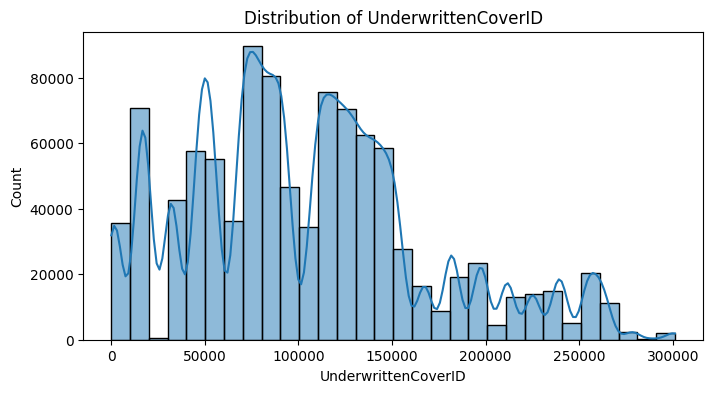

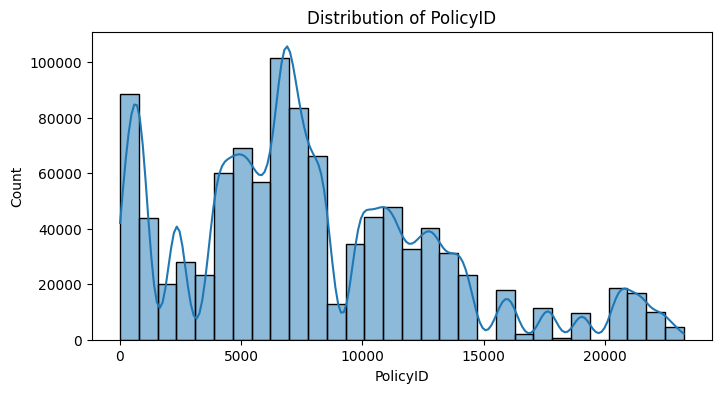

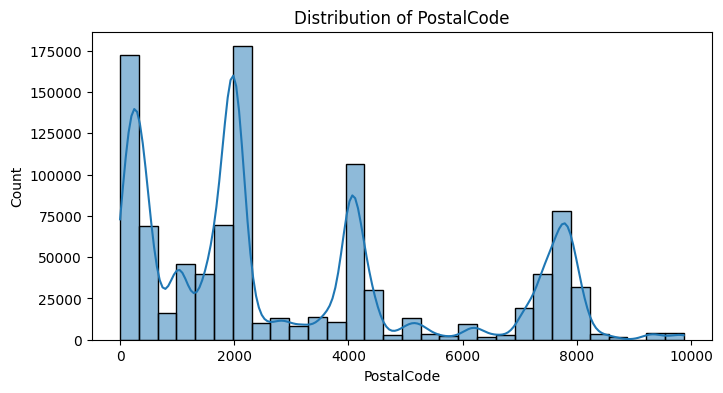

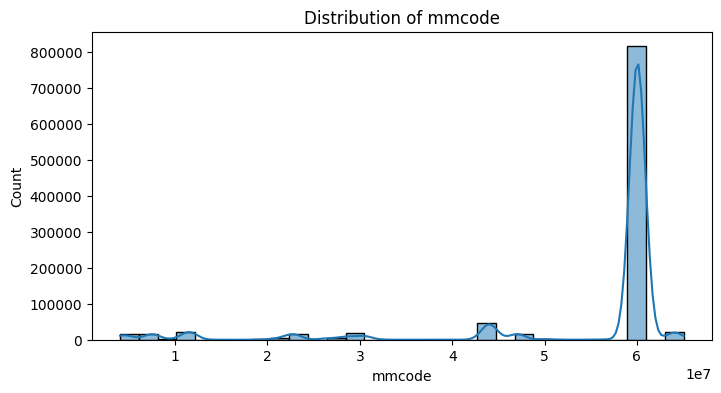

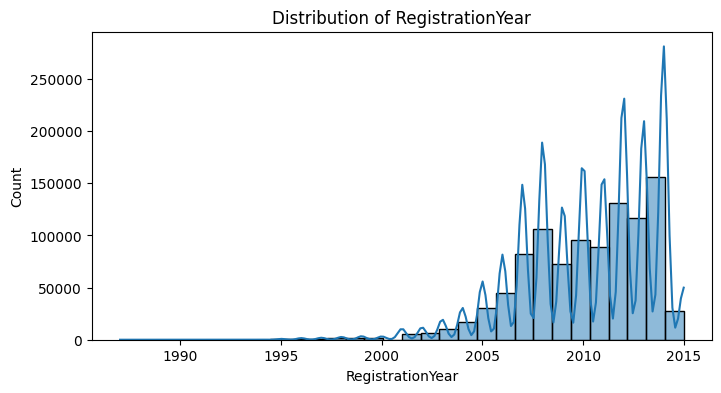

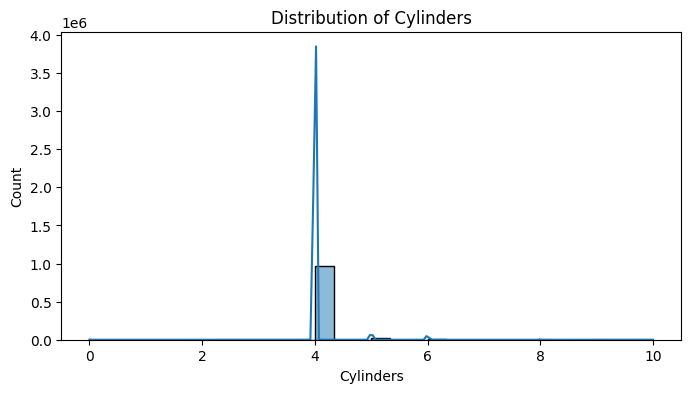

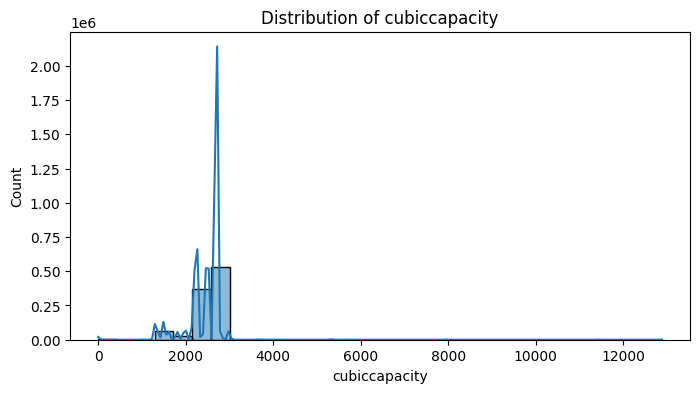

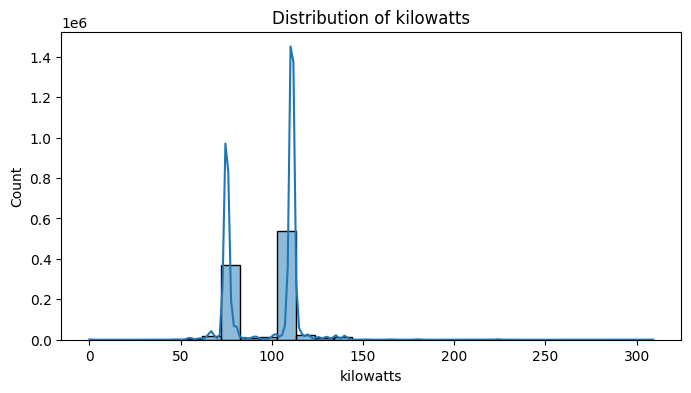

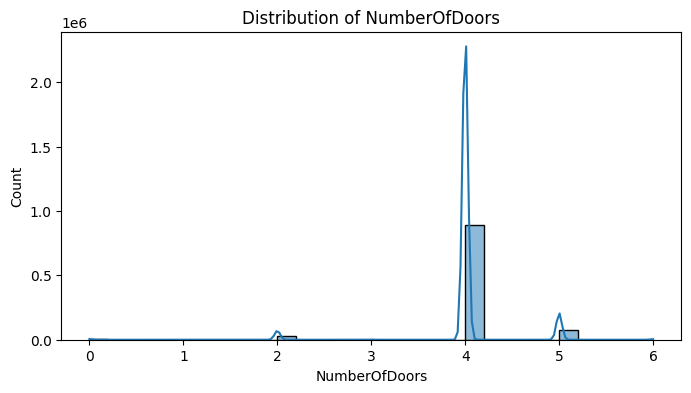

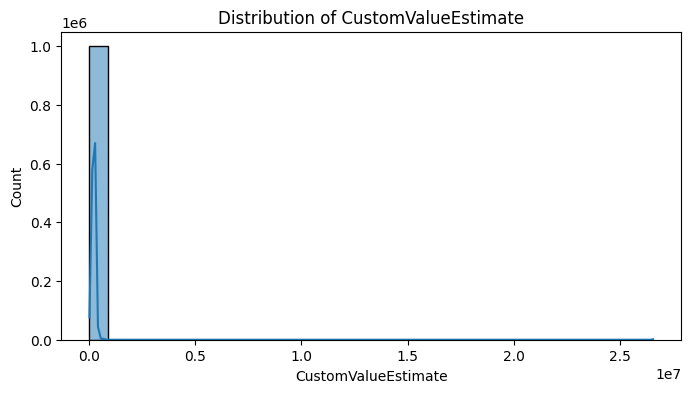

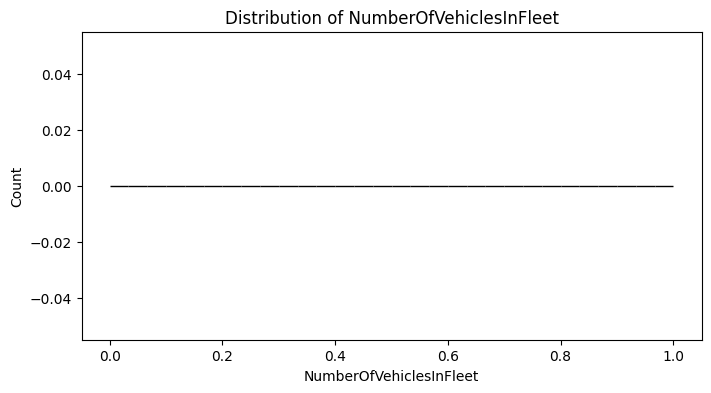

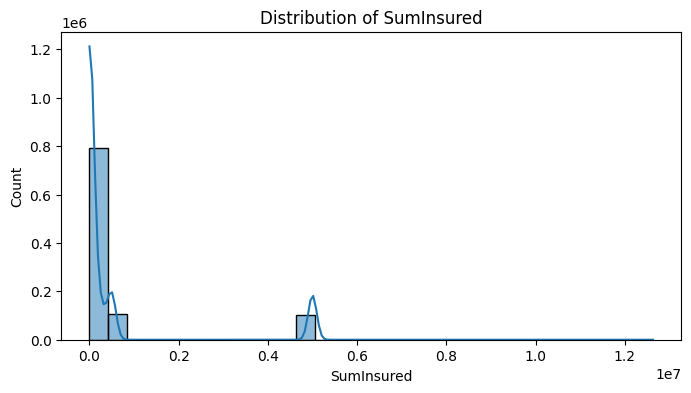

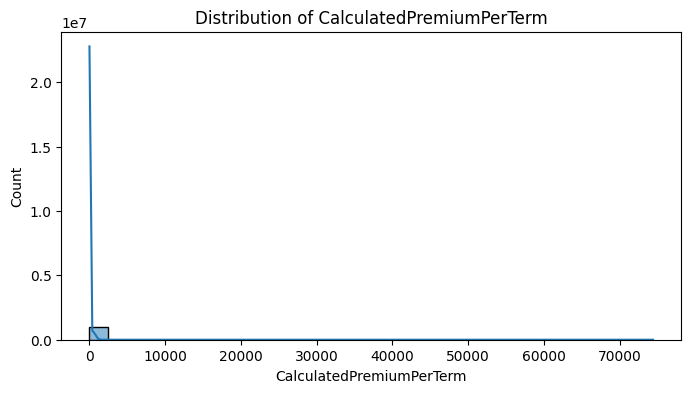

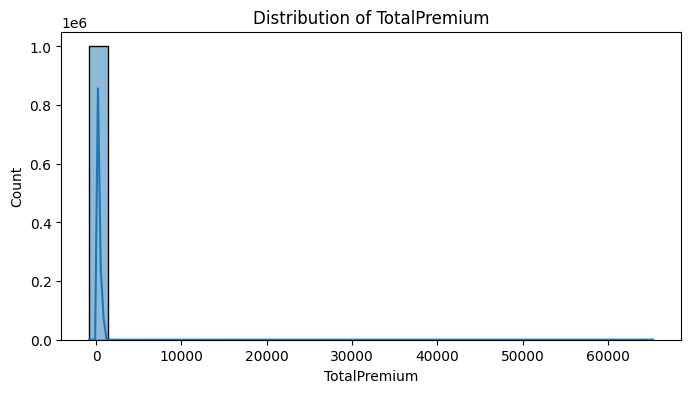

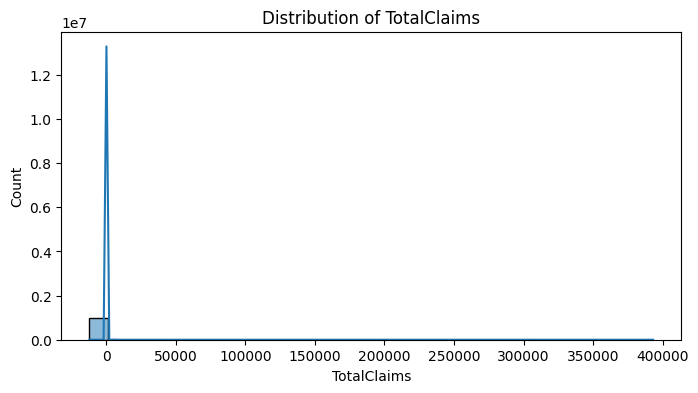

In [7]:
# Plot histograms for numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
plot_histograms(data, numerical_cols)


In [10]:
# Check the data types of all columns
print(data.dtypes)

# Identify problematic columns by attempting to convert all columns to numeric
for col in data.columns:
    try:
        pd.to_numeric(data[col], errors='raise')
    except ValueError as e:
        print(f"Column '{col}' has non-numeric values: {e}")


UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

Correlation Matrix

In [31]:
def correlation_matrix(data):
    """
    Calculate correlation matrix for numerical features.

    Parameters:
        data (pd.DataFrame): DataFrame to process.

    Returns:
        pd.DataFrame: Correlation matrix.
    """
    # Convert numeric-like columns and drop non-numeric columns
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    return numeric_data.corr()


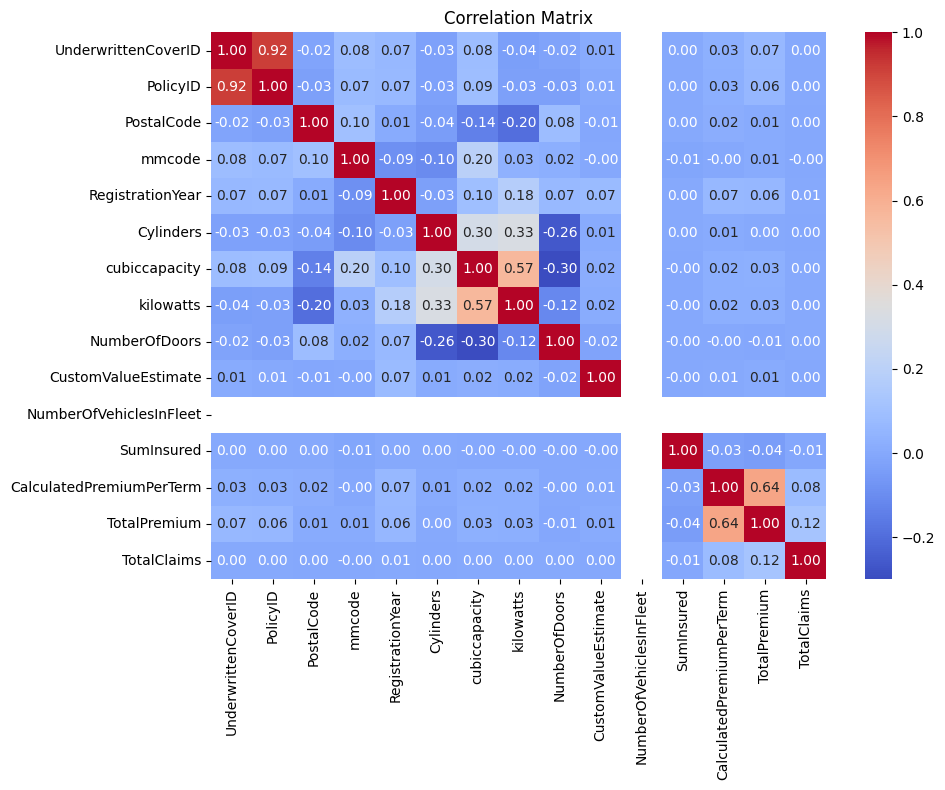

In [33]:
def plot_correlation_matrix(data, output_path=None):
    """
    Calculate and plot the correlation matrix for a given dataset.

    Parameters:
    data (pd.DataFrame): The input data for which the correlation matrix will be computed.
    output_path (str, optional): Path to save the correlation matrix plot. If None, the plot will not be saved.

    Returns:
    pd.DataFrame: The correlation matrix.
    """
    # Compute the correlation matrix
    corr_matrix = correlation_matrix(data)

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix")
    plt.tight_layout()

    # Save the plot if output_path is provided
    if output_path:
        plt.savefig(output_path)

    # Show the plot
    plt.show()

    return corr_matrix
correlation_matrix = plot_correlation_matrix(data)

c:\users\hp\Documents\alpha-care-insurance-analytics\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


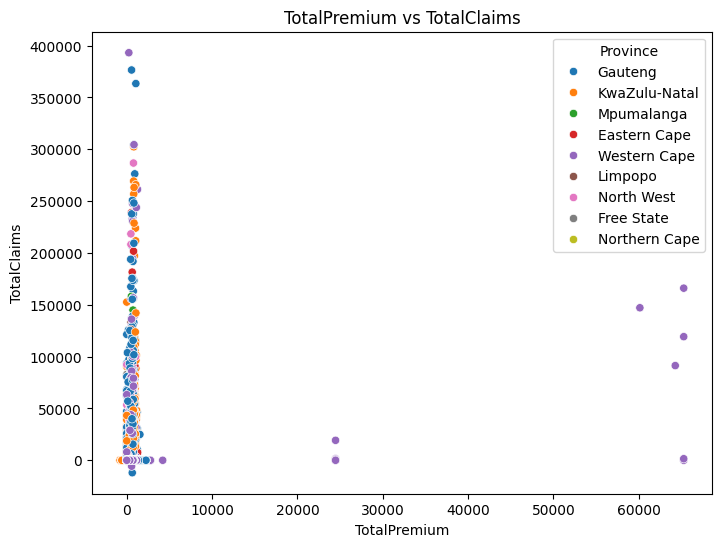

In [29]:
# Scatter plot for TotalPremium vs TotalClaims
plot_scatter(data, 'TotalPremium', 'TotalClaims', hue='Province')
